In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
import sys

#go to seaborn.pydata.org/examples to see examples of how to use it. 

In [9]:
df = pd.DataFrame()

In [10]:
df = pd.read_csv("Combined Data.csv", dtype=object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Columns: 2218 entries, Unnamed: 0 to Total_hydro_generation
dtypes: object(2218)
memory usage: 235.4+ MB


In [11]:
#drop the mysteriously added first column
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

#FOR NOW, replace all blank cells with 0
#NOTE: It may not actually make sense to do this - perhaps other values make more sense
df.replace(' ', 0, inplace=True)

#put the column names of the dataframe into a list
all_column_names = df.columns.tolist()

#loop through the column names to change their data types
for i in all_column_names:
    #if the column name is scenario, year, or month, change the the appropriate datatype 
    if i in ("Scenario", "Year", "Month"):
        if i == "Scenario":
            df[i] = df[i].astype('category')
        else:
            df[i] = df[i].astype(int)
    else: 
        #for columns that aren't scenario, year, and month, change the datatype to float
        df[i] = df[i].astype(float)

# #print the datatypes to make sure we're on the right track
# df.dtypes

In [12]:
# #Add 2010 to each year in the dataframe
# df["Year"] = df["Year"] + 2010

#add a day column, and use it with the year and month columns to create a datetime column
df['Day'] = 1
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

#drop the day column
df.drop('Day', axis=1, inplace=True)

# #check that the df looks good
# df

C:\Users\Sunny\AppData\Local\Temp\ipykernel_8376\334123157.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Day'] = 1
C:\Users\Sunny\AppData\Local\Temp\ipykernel_8376\334123157.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


In [13]:
#create a list for each scenario name
scenario_list = df.Scenario.unique().tolist()

#map each scenario name to a name of the df to hold the data for that scenario
scenario_list_name_mapping = {
    'CanESM': 'CanESM', 
    'CanESM - Max Ag Conservation': 'CanESM_ag',
    'CanESM - Max Wastewater Recycling': 'CanESM_ww', 
    'CanESM - Maximum Urban Outdoor Conservation': 'CanESM_out',
    'CanESM - Maximum Urban Indoor Conservation': 'CanESM_in',
    'CanESM - Max MAR': 'CanESM_mar',
    'CESM1-BGC': 'CESM1BGC', 
    'CESM1-BGC - Max Ag Conservation': 'CESM1BGC_ag',
    'CESM1-BGC - Max Wastewater Recycling': 'CESM1BGC_ww', 
    'CESM1-BGC - Maximum Urban Outdoor Conservation': 'CESM1BGC_out',
    'CESM1-BGC - Maximum Urban Indoor Conservation': 'CESM1BGC_in',
    'CESM1-BGC - Max MAR': 'CESM1BGC_mar',
    'CMCC-CM': 'CMCCCM', 
    'CMCC-CM - Max Ag Conservation': 'CMCCCM_ag',
    'CMCC-CM - Max Wastewater Recycling': 'CMCCCM_ww', 
    'CMCC-CM - Maximum Urban Outdoor Conservation': 'CMCCCM_out',
    'CMCC-CM - Maximum Urban Indoor Conservation': 'CMCCCM_in',
    'CMCC-CM - Max MAR': 'CMCCCM_mar',
    'RefLOCA': 'RefLOCA'}      

In [14]:
#define a function that creates a dataframe from the existing one, when passed a dataframe, 
#a column to use to split the data, and a value to filer for in that column
def create_dataframe (df, df_column_name, split_value):
    return df[df[df_column_name] == split_value]

#loop through the list of scenarios
for i in scenario_list:
    #create a variable that looks up the desired new name of the scenario from the 
    #scenario_list_name_mapping dictionary
    new_df_name = 'df' + scenario_list_name_mapping[i]
    #create a new variable with the desired df name, using the create_dataframe function
    globals()[new_df_name] = create_dataframe(df, "Scenario", i)

In [15]:
#reset the index on these new dataframes so that they have a common index
#this is important to be able to loop through the dataframes later
dfCanESM = dfCanESM.reset_index(drop=True)
dfCanESM_ag = dfCanESM_ag.reset_index(drop=True)
dfCanESM_ww = dfCanESM_ww.reset_index(drop=True)
dfCanESM_out = dfCanESM_out.reset_index(drop=True)
dfCanESM_in = dfCanESM_in.reset_index(drop=True)
dfCanESM_mar = dfCanESM_mar.reset_index(drop=True)
dfCESM1BGC = dfCESM1BGC.reset_index(drop=True)
dfCESM1BGC_ag = dfCESM1BGC_ag.reset_index(drop=True)
dfCESM1BGC_ww = dfCESM1BGC_ww.reset_index(drop=True)
dfCESM1BGC_out = dfCESM1BGC_out.reset_index(drop=True)
dfCESM1BGC_in = dfCESM1BGC_in.reset_index(drop=True)
dfCESM1BGC_mar = dfCESM1BGC_mar.reset_index(drop=True)
dfCMCCCM = dfCMCCCM.reset_index(drop=True)
dfCMCCCM_ag = dfCMCCCM_ag.reset_index(drop=True)
dfCMCCCM_ww = dfCMCCCM_ww.reset_index(drop=True)
dfCMCCCM_out = dfCMCCCM_out.reset_index(drop=True)
dfCMCCCM_in = dfCMCCCM_in.reset_index(drop=True)
dfCMCCCM_mar = dfCMCCCM_mar.reset_index(drop=True)
dfRefLOCA = dfRefLOCA.reset_index(drop=True)

In [16]:
CanESM_dfs = [dfCanESM, dfCanESM_ag, dfCanESM_ww, dfCanESM_out, dfCanESM_in, dfCanESM_mar]
CESM1BGC_dfs = [dfCESM1BGC, dfCESM1BGC_ag, dfCESM1BGC_ww, dfCESM1BGC_out, dfCESM1BGC_in, dfCESM1BGC_mar]
CMCCCM_dfs = [dfCMCCCM, dfCMCCCM_ag, dfCMCCCM_ww, dfCMCCCM_out, dfCMCCCM_in, dfCMCCCM_mar]
CanESM_labels = ['CanESM', 'CanESM_ag', 'CanESM_ww', 'CanESM_out', 'CanESM_in', 'CanESM_mar']
CESM1BGC_labels = ['CESM1BGC', 'CESM1BGC_ag', 'CESM1BGC_ww', 'CESM1BGC_out', 'CESM1BGC_in', 'CESM1BGC_mar']  
CMCCCM_labels = ['CMCCCM', 'CMCCCM_ag', 'CMCCCM_ww', 'CMCCCM_out', 'CMCCCM_in', 'CMCCCM_mar']  
CanESM_csv_names = ['CanESM.csv', 'CanESM_ag.csv', 'CanESM_ww.csv', 'CanESM_out.csv', 'CanESM_in.csv', 'CanESM_mar.csv']
CESM1BGC_csv_names = ['CESM1BGC.csv', 'CESM1BGC_ag.csv', 'CESM1BGC_ww.csv', 'CESM1BGC_out.csv', 'CESM1BGC_in.csv', 'CESM1BGC_mar.csv']  
CMCCCM_csv_names = ['CMCCCM.csv', 'CMCCCM_ag.csv', 'CMCCCM_ww.csv', 'CMCCCM_out.csv', 'CMCCCM_in.csv', 'CMCCCM_mar.csv']  

In [ ]:
#write a function that will let us compare differences across climate and adaptation scenarios
def determine_differences(df1, df2, comparison_columns, column_name): 
    #double check the dataframes passed in are of the same length
    if df1.shape[0] != df2.shape[0]:
        print('The dataframes must have the same number of rows')
        sys.exit()

    #define variables that will be needed for the function
    data_row=()
    all_differences=[]

    #for each column we are comparing in the dataframes
    for i in comparison_columns:
        #go through each row of data
        for counter in range(df1.shape[0]):
            #double check the dataframes have the same date at the same location
            if df1.Date[counter] != df2.Date[counter]:
                print('The data frames do not have the same date in row', counter)
                sys.exit()
            #assign a value for each dataframe in this location
            value_df1 = df1.loc[counter, i]
            value_df2 = df2.loc[counter, i]
            #check if those values from each data frame are meaningfully different
            if abs(value_df1 - value_df2)>1:
                # if the values are meaningfully different, then create a list (row) of the key values which are different
                data_row = [df1.Date[counter], i, round(value_df1 - value_df2, 0)]
                #add the list (row) to the list of data which is not the same
                all_differences.append(data_row)
    #use the list of lists to create a dataframe
    df = pd.DataFrame(all_differences, columns = ['Date', 'Location', column_name])

    #return that dataframe
    return df

In [ ]:
# Create the lists of columns I will need for making metrics
indoor_unmet_demand_columns = [col for col in df.columns if 'Unmet_Dem_IN_' in col]
outdoor_unmet_demand_columns = [col for col in df.columns if 'Unmet_Dem_OUT_' in col]

ag_unmet_demand_columns = [col for col in df.columns if 'Unmet_Dem_' in col]
ag_unmet_demand_columns = [col for col in ag_unmet_demand_columns if col not in indoor_unmet_demand_columns]
ag_unmet_demand_columns = [col for col in ag_unmet_demand_columns if col not in outdoor_unmet_demand_columns]

groundwater_storage_columns = [col for col in df.columns if 'GW_storage_' in col]

electricity_demand_columns = [col for col in df.columns if 'Elec_' in col]

hydropower_generation_columns = [col for col in df.columns if 'Hydro_' in col]

In [ ]:
#make first order comparisons of RefLOCA to climate scenarios
column_name = 'Reduction_in_unmet_demand'
dfCanESM_impacts_indoor_unmet_demand = determine_differences(dfRefLOCA, dfCanESM, indoor_unmet_demand_columns, column_name)
dfCESM1BGC_impacts_indoor_unmet_demand = determine_differences(dfRefLOCA, dfCESM1BGC, indoor_unmet_demand_columns, column_name)
dfCMCCCM_impacts_indoor_unmet_demand = determine_differences(dfRefLOCA, dfCMCCCM, indoor_unmet_demand_columns, column_name)

dfCanESM_impacts_outdoor_unmet_demand = determine_differences(dfRefLOCA, dfCanESM, outdoor_unmet_demand_columns, column_name)
dfCESM1BGC_impacts_outdoor_unmet_demand = determine_differences(dfRefLOCA, dfCESM1BGC, outdoor_unmet_demand_columns, column_name)
dfCMCCCM_impacts_outdoor_unmet_demand = determine_differences(dfRefLOCA, dfCMCCCM, outdoor_unmet_demand_columns, column_name)

dfCanESM_impacts_ag_unmet_demand = determine_differences(dfRefLOCA, dfCanESM, ag_unmet_demand_columns, column_name)
dfCESM1BGC_impacts_ag_unmet_demand = determine_differences(dfRefLOCA, dfCESM1BGC, ag_unmet_demand_columns, column_name)
dfCMCCCM_impacts_ag_unmet_demand = determine_differences(dfRefLOCA, dfCMCCCM, ag_unmet_demand_columns, column_name)

column_name='Increase_in_gw_storage'
dfCanESM_impacts_groundwater_storage = determine_differences(dfCanESM, dfRefLOCA, groundwater_storage_columns, column_name)
dfCESM1BGC_impacts_groundwater_storage = determine_differences(dfCESM1BGC, dfRefLOCA, groundwater_storage_columns, column_name)
dfCMCCCM_impacts_groundwater_storage = determine_differences(dfCMCCCM, dfRefLOCA, groundwater_storage_columns, column_name)

column_name='Reduction_in_electricity_demand'
dfCanESM_impacts_electric_demand = determine_differences(dfRefLOCA, dfCanESM, electricity_demand_columns, column_name)
dfCESM1BGC_impacts_electric_demand = determine_differences(dfRefLOCA, dfCESM1BGC, electricity_demand_columns, column_name)
dfCMCCCM_impacts_electric_demand = determine_differences(dfRefLOCA, dfCMCCCM, electricity_demand_columns, column_name)

column_name='Reduction_in_hydropower_generation'
dfCanESM_impacts_hydropower_generation = determine_differences(dfRefLOCA, dfCanESM, hydropower_generation_columns, column_name)
dfCESM1BGC_impacts_hydropower_generation = determine_differences(dfRefLOCA, dfCESM1BGC, hydropower_generation_columns, column_name)
dfCMCCCM_impacts_hydropower_generation = determine_differences(dfRefLOCA, dfCMCCCM, hydropower_generation_columns, column_name)


In [ ]:
#make a comparison df for all CanESM data
#data format is [climate scenario]_[adaptation scenario]_[metric of interest]
column_name = 'Reduction_in_unmet_demand'
dfCanESM_ag_impacts_indoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_ag, indoor_unmet_demand_columns, column_name)
dfCanESM_ww_impacts_indoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_ww, indoor_unmet_demand_columns, column_name)
dfCanESM_out_impacts_indoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_out, indoor_unmet_demand_columns, column_name)
dfCanESM_in_impacts_indoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_in, indoor_unmet_demand_columns, column_name)
dfCanESM_mar_impacts_indoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_mar, indoor_unmet_demand_columns, column_name)

dfCanESM_ag_impacts_outdoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_ag, outdoor_unmet_demand_columns, column_name)
dfCanESM_ww_impacts_outdoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_ww, outdoor_unmet_demand_columns, column_name)
dfCanESM_out_impacts_outdoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_out, outdoor_unmet_demand_columns, column_name)
dfCanESM_in_impacts_outdoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_in, outdoor_unmet_demand_columns, column_name)
dfCanESM_mar_impacts_outdoor_unmet_demand = determine_differences(dfCanESM, dfCanESM_mar, outdoor_unmet_demand_columns, column_name)

dfCanESM_ag_impacts_ag_unmet_demand = determine_differences(dfCanESM, dfCanESM_ag, ag_unmet_demand_columns, column_name)
dfCanESM_ww_impacts_ag_unmet_demand = determine_differences(dfCanESM, dfCanESM_ww, ag_unmet_demand_columns, column_name)
dfCanESM_out_impacts_ag_unmet_demand = determine_differences(dfCanESM, dfCanESM_out, ag_unmet_demand_columns, column_name)
dfCanESM_in_impacts_ag_unmet_demand = determine_differences(dfCanESM, dfCanESM_in, ag_unmet_demand_columns, column_name)
dfCanESM_mar_impacts_ag_unmet_demand = determine_differences(dfCanESM, dfCanESM_mar, ag_unmet_demand_columns, column_name)

column_name='Increase_in_gw_storage'
dfCanESM_ag_impacts_groundwater_storage = determine_differences(dfCanESM_ag, dfCanESM, groundwater_storage_columns, column_name)
dfCanESM_ww_impacts_groundwater_storage = determine_differences(dfCanESM_ww, dfCanESM, groundwater_storage_columns, column_name)
dfCanESM_out_impacts_groundwater_storage = determine_differences(dfCanESM_out, dfCanESM, groundwater_storage_columns, column_name)
dfCanESM_in_impacts_groundwater_storage = determine_differences(dfCanESM_in, dfCanESM, groundwater_storage_columns, column_name)
dfCanESM_mar_impacts_groundwater_storage = determine_differences(dfCanESM_mar, dfCanESM, groundwater_storage_columns, column_name)

column_name='Reduction_in_electricity_demand'
dfCanESM_ag_impacts_electric_demand = determine_differences(dfCanESM, dfCanESM_ag, electricity_demand_columns, column_name)
dfCanESM_ww_impacts_electric_demand = determine_differences(dfCanESM, dfCanESM_ww, electricity_demand_columns, column_name)
dfCanESM_out_impacts_electric_demand = determine_differences(dfCanESM, dfCanESM_out, electricity_demand_columns, column_name)
dfCanESM_in_impacts_electric_demand = determine_differences(dfCanESM, dfCanESM_in, electricity_demand_columns, column_name)
dfCanESM_mar_impacts_electric_demand = determine_differences(dfCanESM, dfCanESM_mar, electricity_demand_columns, column_name)

column_name='Reduction_in_hydropower_generation'
dfCanESM_ag_impacts_hydropower_generation = determine_differences(dfCanESM, dfCanESM_ag, hydropower_generation_columns, column_name)
dfCanESM_ww_impacts_hydropower_generation = determine_differences(dfCanESM, dfCanESM_ww, hydropower_generation_columns, column_name)
dfCanESM_out_impacts_hydropower_generation = determine_differences(dfCanESM, dfCanESM_out, hydropower_generation_columns, column_name)
dfCanESM_in_impacts_hydropower_generation = determine_differences(dfCanESM, dfCanESM_in, hydropower_generation_columns, column_name)
dfCanESM_mar_impacts_hydropower_generation = determine_differences(dfCanESM, dfCanESM_mar, hydropower_generation_columns, column_name)

In [ ]:
#make a comparison df for all CESM1BGC data
#data format is [climate scenario]_[adaptation scenario]_[metric of interest]
column_name = 'Reduction_in_unmet_demand'
dfCESM1BGC_ag_impacts_indoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ag, indoor_unmet_demand_columns, column_name)
dfCESM1BGC_ww_impacts_indoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ww, indoor_unmet_demand_columns, column_name)
dfCESM1BGC_out_impacts_indoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_out, indoor_unmet_demand_columns, column_name)
dfCESM1BGC_in_impacts_indoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_in, indoor_unmet_demand_columns, column_name)
dfCESM1BGC_mar_impacts_indoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_mar, indoor_unmet_demand_columns, column_name)

dfCESM1BGC_ag_impacts_outdoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ag, outdoor_unmet_demand_columns, column_name)
dfCESM1BGC_ww_impacts_outdoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ww, outdoor_unmet_demand_columns, column_name)
dfCESM1BGC_out_impacts_outdoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_out, outdoor_unmet_demand_columns, column_name)
dfCESM1BGC_in_impacts_outdoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_in, outdoor_unmet_demand_columns, column_name)
dfCESM1BGC_mar_impacts_outdoor_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_mar, outdoor_unmet_demand_columns, column_name)

dfCESM1BGC_ag_impacts_ag_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ag, ag_unmet_demand_columns, column_name)
dfCESM1BGC_ww_impacts_ag_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ww, ag_unmet_demand_columns, column_name)
dfCESM1BGC_out_impacts_ag_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_out, ag_unmet_demand_columns, column_name)
dfCESM1BGC_in_impacts_ag_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_in, ag_unmet_demand_columns, column_name)
dfCESM1BGC_mar_impacts_ag_unmet_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_mar, ag_unmet_demand_columns, column_name)

column_name='Increase_in_gw_storage'
dfCESM1BGC_ag_impacts_groundwater_storage = determine_differences(dfCESM1BGC_ag, dfCESM1BGC, groundwater_storage_columns, column_name)
dfCESM1BGC_ww_impacts_groundwater_storage = determine_differences(dfCESM1BGC_ww, dfCESM1BGC, groundwater_storage_columns, column_name)
dfCESM1BGC_out_impacts_groundwater_storage = determine_differences(dfCESM1BGC_out, dfCESM1BC, groundwater_storage_columns, column_name)
dfCESM1BGC_in_impacts_groundwater_storage = determine_differences(dfCESM1BGC_in, dfCESM1BGC, groundwater_storage_columns, column_name)
dfCESM1BGC_mar_impacts_groundwater_storage = determine_differences(dfCESM1BGC_ag, dfCESM1BGC, groundwater_storage_columns, column_name)

column_name='Reduction_in_electricity_demand'
dfCESM1BGC_ag_impacts_electric_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ag, electricity_demand_columns, column_name)
dfCESM1BGC_ww_impacts_electric_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_ww, electricity_demand_columns, column_name)
dfCESM1BGC_out_impacts_electric_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_out, electricity_demand_columns, column_name)
dfCESM1BGC_in_impacts_electric_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_in, electricity_demand_columns, column_name)
dfCESM1BGC_mar_impacts_electric_demand = determine_differences(dfCESM1BGC, dfCESM1BGC_mar, electricity_demand_columns, column_name)

column_name='Reduction_in_hydropower_demand'
dfCESM1BGC_ag_impacts_hydropower_generation = determine_differences(dfCESM1BGC, dfCESM1BGC_ag, hydropower_generation_columns, column_name)
dfCESM1BGC_ww_impacts_hydropower_generation = determine_differences(dfCESM1BGC, dfCESM1BGC_ww, hydropower_generation_columns, column_name)
dfCESM1BGC_out_impacts_hydropower_generation = determine_differences(dfCESM1BGC, dfCESM1BGC_out, hydropower_generation_columns, column_name)
dfCESM1BGC_in_impacts_hydropower_generation = determine_differences(dfCESM1BGC, dfCESM1BGC_in, hydropower_generation_columns, column_name)
dfCESM1BGC_mar_impacts_hydropower_generation = determine_differences(dfCESM1BGC, dfCESM1BGC_mar, hydropower_generation_columns, column_name)  

In [ ]:
#make a comparison df for all CMCCCM data
#data format is [climate scenario]_[adaptation scenario]_[metric of interest]
column_name = 'Reduction_in_unmet_demand'
dfCMCCCM_ag_impacts_indoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_ag, indoor_unmet_demand_columns, column_name)
dfCMCCCM_ww_impacts_indoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_ww, indoor_unmet_demand_columns, column_name)
dfCMCCCM_out_impacts_indoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_out, indoor_unmet_demand_columns, column_name)
dfCMCCCM_in_impacts_indoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_in, indoor_unmet_demand_columns, column_name)
dfCMCCCM_mar_impacts_indoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_mar, indoor_unmet_demand_columns, column_name)

dfCMCCCM_ag_impacts_outdoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_ag, outdoor_unmet_demand_columns, column_name)
dfCMCCCM_ww_impacts_outdoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_ww, outdoor_unmet_demand_columns, column_name)
dfCMCCCM_out_impacts_outdoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_out, outdoor_unmet_demand_columns, column_name)
dfCMCCCM_in_impacts_outdoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_in, outdoor_unmet_demand_columns, column_name)
dfCMCCCM_mar_impacts_outdoor_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_mar, outdoor_unmet_demand_columns, column_name)

dfCMCCCM_ag_impacts_ag_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_ag, ag_unmet_demand_columns, column_name)
dfCMCCCM_ww_impacts_ag_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_ww, ag_unmet_demand_columns, column_name)
dfCMCCCM_out_impacts_ag_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_out, ag_unmet_demand_columns, column_name)
dfCMCCCM_in_impacts_ag_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_in, ag_unmet_demand_columns, column_name)
dfCMCCCM_mar_impacts_ag_unmet_demand = determine_differences(dfCMCCCM, dfCMCCCM_mar, ag_unmet_demand_columns, column_name)

column_name='Increase_in_gw_storage'
dfCMCCCM_ag_impacts_groundwater_storage = determine_differences(dfCMCCCM_ag, dfCMCCCM, groundwater_storage_columns, column_name)
dfCMCCCM_ww_impacts_groundwater_storage = determine_differences(dfCMCCCM_ww, dfCMCCCM, groundwater_storage_columns, column_name)
dfCMCCCM_out_impacts_groundwater_storage = determine_differences(dfCMCCCM_out, dfCMCCCM, groundwater_storage_columns, column_name)
dfCMCCCM_in_impacts_groundwater_storage = determine_differences(dfCMCCCM_in, dfCMCCCM, groundwater_storage_columns, column_name)
dfCMCCCM_mar_impacts_groundwater_storage = determine_differences(dfCMCCCM_mar, dfCMCCCM, groundwater_storage_columns, column_name)

column_name='Reduction_in_electricity_demand'
dfCMCCCM_ag_impacts_electric_demand = determine_differences(dfCMCCCM, dfCMCCCM_ag, electricity_demand_columns, column_name)
dfCMCCCM_ww_impacts_electric_demand = determine_differences(dfCMCCCM, dfCMCCCM_ww, electricity_demand_columns, column_name)
dfCMCCCM_out_impacts_electric_demand = determine_differences(dfCMCCCM, dfCMCCCM_out, electricity_demand_columns, column_name)
dfCMCCCM_in_impacts_electric_demand = determine_differences(dfCMCCCM, dfCMCCCM_in, electricity_demand_columns, column_name)
dfCMCCCM_mar_impacts_electric_demand = determine_differences(dfCMCCCM, dfCMCCCM_mar, electricity_demand_columns, column_name)

column_name='Reduction_in_hydropower_demand'
dfCMCCCM_ag_impacts_hydropower_generation = determine_differences(dfCMCCCM, dfCMCCCM_ag, hydropower_generation_columns, column_name)
dfCMCCCM_ww_impacts_hydropower_generation = determine_differences(dfCMCCCM, dfCMCCCM_ww, hydropower_generation_columns, column_name)
dfCMCCCM_out_impacts_hydropower_generation = determine_differences(dfCMCCCM, dfCMCCCM_out, hydropower_generation_columns, column_name)
dfCMCCCM_in_impacts_hydropower_generation = determine_differences(dfCMCCCM, dfCMCCCM_in, hydropower_generation_columns, column_name)
dfCMCCCM_mar_impacts_hydropower_generation = determine_differences(dfCMCCCM, dfCMCCCM_mar, hydropower_generation_columns, column_name)  

In [ ]:
#create a list of the new dfs, so we can manipulate them in loops
difference_dfs_list = [
    dfCanESM_ag_impacts_indoor_unmet_demand, dfCanESM_ww_impacts_indoor_unmet_demand, 
    dfCanESM_out_impacts_indoor_unmet_demand, dfCanESM_in_impacts_indoor_unmet_demand, 
    dfCanESM_mar_impacts_indoor_unmet_demand,
    
    dfCanESM_ag_impacts_outdoor_unmet_demand, dfCanESM_ww_impacts_outdoor_unmet_demand, 
    dfCanESM_out_impacts_outdoor_unmet_demand, dfCanESM_in_impacts_outdoor_unmet_demand, 
    dfCanESM_mar_impacts_outdoor_unmet_demand, 

    dfCanESM_ag_impacts_ag_unmet_demand, dfCanESM_ww_impacts_ag_unmet_demand,
    dfCanESM_out_impacts_ag_unmet_demand, dfCanESM_in_impacts_ag_unmet_demand, 
    dfCanESM_mar_impacts_ag_unmet_demand, 
    
    dfCanESM_ag_impacts_groundwater_storage, dfCanESM_ww_impacts_groundwater_storage,
    dfCanESM_out_impacts_groundwater_storage, dfCanESM_in_impacts_groundwater_storage,
    dfCanESM_mar_impacts_groundwater_storage,

    dfCanESM_ag_impacts_electric_demand, dfCanESM_ww_impacts_electric_demand, 
    dfCanESM_out_impacts_electric_demand, dfCanESM_in_impacts_electric_demand,
    dfCanESM_mar_impacts_electric_demand,

    dfCanESM_ag_impacts_hydropower_generation, dfCanESM_ww_impacts_hydropower_generation, 
    dfCanESM_out_impacts_hydropower_generation, dfCanESM_in_impacts_hydropower_generation,
    dfCanESM_mar_impacts_hydropower_generation,

    dfCESM1BGC_ag_impacts_indoor_unmet_demand, dfCESM1BGC_ww_impacts_indoor_unmet_demand, 
    dfCESM1BGC_out_impacts_indoor_unmet_demand, dfCESM1BGC_in_impacts_indoor_unmet_demand, 
    dfCESM1BGC_mar_impacts_indoor_unmet_demand,
    
    dfCESM1BGC_ag_impacts_outdoor_unmet_demand, dfCESM1BGC_ww_impacts_outdoor_unmet_demand, 
    dfCESM1BGC_out_impacts_outdoor_unmet_demand, dfCESM1BGC_in_impacts_outdoor_unmet_demand, 
    dfCESM1BGC_mar_impacts_outdoor_unmet_demand, 

    dfCESM1BGC_ag_impacts_ag_unmet_demand, dfCESM1BGC_ww_impacts_ag_unmet_demand,
    dfCESM1BGC_out_impacts_ag_unmet_demand, dfCESM1BGC_in_impacts_ag_unmet_demand, 
    dfCESM1BGC_mar_impacts_ag_unmet_demand, 
    
    dfCESM1BGC_ag_impacts_groundwater_storage, dfCESM1BGC_ww_impacts_groundwater_storage,
    dfCESM1BGC_out_impacts_groundwater_storage, dfCESM1BGC_in_impacts_groundwater_storage,
    dfCESM1BGC_mar_impacts_groundwater_storage,

    dfCESM1BGC_ag_impacts_electric_demand, dfCESM1BGC_ww_impacts_electric_demand, 
    dfCESM1BGC_out_impacts_electric_demand, dfCESM1BGC_in_impacts_electric_demand,
    dfCESM1BGC_mar_impacts_electric_demand,

    dfCESM1BGC_ag_impacts_hydropower_generation, dfCESM1BGC_ww_impacts_hydropower_generation, 
    dfCESM1BGC_out_impacts_hydropower_generation, dfCESM1BGC_in_impacts_hydropower_generation,
    dfCESM1BGC_mar_impacts_hydropower_generation,

    dfCMCCCM_ag_impacts_indoor_unmet_demand, dfCMCCCM_ww_impacts_indoor_unmet_demand, 
    dfCMCCCM_out_impacts_indoor_unmet_demand, dfCMCCCM_in_impacts_indoor_unmet_demand, 
    dfCMCCCM_mar_impacts_indoor_unmet_demand,
    
    dfCMCCCM_ag_impacts_outdoor_unmet_demand, dfCMCCCM_ww_impacts_outdoor_unmet_demand, 
    dfCMCCCM_out_impacts_outdoor_unmet_demand, dfCMCCCM_in_impacts_outdoor_unmet_demand, 
    dfCMCCCM_mar_impacts_outdoor_unmet_demand, 

    dfCMCCCM_ag_impacts_ag_unmet_demand, dfCMCCCM_ww_impacts_ag_unmet_demand,
    dfCMCCCM_out_impacts_ag_unmet_demand, dfCMCCCM_in_impacts_ag_unmet_demand, 
    dfCMCCCM_mar_impacts_ag_unmet_demand, 
    
    dfCMCCCM_ag_impacts_groundwater_storage, dfCMCCCM_ww_impacts_groundwater_storage,
    dfCMCCCM_out_impacts_groundwater_storage, dfCMCCCM_in_impacts_groundwater_storage,
    dfCMCCCM_mar_impacts_groundwater_storage,

    dfCMCCCM_ag_impacts_electric_demand, dfCMCCCM_ww_impacts_electric_demand, 
    dfCMCCCM_out_impacts_electric_demand, dfCMCCCM_in_impacts_electric_demand,
    dfCMCCCM_mar_impacts_electric_demand, 

    dfCMCCCM_ag_impacts_hydropower_generation, dfCMCCCM_ww_impacts_hydropower_generation, 
    dfCMCCCM_out_impacts_hydropower_generation, dfCMCCCM_in_impacts_hydropower_generation,
    dfCMCCCM_mar_impacts_hydropower_generation,
]

In [ ]:
difference_dfs_name_list = [
    'dfCanESM_ag_impacts_indoor_unmet_demand.csv', 'dfCanESM_ww_impacts_indoor_unmet_demand.csv', 
    'dfCanESM_out_impacts_indoor_unmet_demand.csv', 'dfCanESM_in_impacts_indoor_unmet_demand.csv', 
    'dfCanESM_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCanESM_ag_impacts_outdoor_unmet_demand.csv', 'dfCanESM_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCanESM_out_impacts_outdoor_unmet_demand.csv', 'dfCanESM_in_impacts_outdoor_unmet_demand.csv', 
    'dfCanESM_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCanESM_ag_impacts_ag_unmet_demand.csv', 'dfCanESM_ww_impacts_ag_unmet_demand.csv',
    'dfCanESM_out_impacts_ag_unmet_demand.csv', 'dfCanESM_in_impacts_ag_unmet_demand.csv', 
    'dfCanESM_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCanESM_ag_impacts_groundwater_storage.csv', 'dfCanESM_ww_impacts_groundwater_storage.csv',
    'dfCanESM_out_impacts_groundwater_storage.csv', 'dfCanESM_in_impacts_groundwater_storage.csv',
    'dfCanESM_mar_impacts_groundwater_storage.csv',

    'dfCanESM_ag_impacts_electric_demand.csv', 'dfCanESM_ww_impacts_electric_demand.csv', 
    'dfCanESM_out_impacts_electric_demand.csv', 'dfCanESM_in_impacts_electric_demand.csv',
    'dfCanESM_mar_impacts_electric_demand.csv',

    'dfCanESM_ag_impacts_hydropower_generation.csv', 'dfCanESM_ww_impacts_hydropower_generation.csv', 
    'dfCanESM_out_impacts_hydropower_generation.csv', 'dfCanESM_in_impacts_hydropower_generation.csv',
    'dfCanESM_mar_impacts_hydropower_generation.csv',

    'dfCESM1BGC_ag_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_indoor_unmet_demand.csv', 
    'dfCESM1BGC_out_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_in_impacts_indoor_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCESM1BGC_ag_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCESM1BGC_out_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_in_impacts_outdoor_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCESM1BGC_ag_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_ag_unmet_demand.csv',
    'dfCESM1BGC_out_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_in_impacts_ag_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCESM1BGC_ag_impacts_groundwater_storage.csv', 'dfCESM1BGC_ww_impacts_groundwater_storage.csv',
    'dfCESM1BGC_out_impacts_groundwater_storage.csv', 'dfCESM1BGC_in_impacts_groundwater_storage.csv',
    'dfCESM1BGC_mar_impacts_groundwater_storage.csv',

    'dfCESM1BGC_ag_impacts_electric_demand.csv', 'dfCESM1BGC_ww_impacts_electric_demand.csv', 
    'dfCESM1BGC_out_impacts_electric_demand.csv', 'dfCESM1BGC_in_impacts_electric_demand.csv',
    'dfCESM1BGC_mar_impacts_electric_demand.csv',

    'dfCESM1BGC_ag_impacts_hydropower_generation.csv', 'dfCESM1BGC_ww_impacts_hydropower_generation.csv', 
    'dfCESM1BGC_out_impacts_hydropower_generation.csv', 'dfCESM1BGC_in_impacts_hydropower_generation.csv',
    'dfCESM1BGC_mar_impacts_hydropower_generation.csv',

    'dfCMCCCM_ag_impacts_indoor_unmet_demand.csv', 'dfCMCCCM_ww_impacts_indoor_unmet_demand.csv', 
    'dfCMCCCM_out_impacts_indoor_unmet_demand.csv', 'dfCMCCCM_in_impacts_indoor_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCMCCCM_ag_impacts_outdoor_unmet_demand.csv', 'dfCMCCCM_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_out_impacts_outdoor_unmet_demand.csv', 'dfCMCCCM_in_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCMCCCM_ag_impacts_ag_unmet_demand.csv', 'dfCMCCCM_ww_impacts_ag_unmet_demand.csv',
    'dfCMCCCM_out_impacts_ag_unmet_demand.csv', 'dfCMCCCM_in_impacts_ag_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCMCCCM_ag_impacts_groundwater_storage.csv', 'dfCMCCCM_ww_impacts_groundwater_storage.csv',
    'dfCMCCCM_out_impacts_groundwater_storage.csv', 'dfCMCCCM_in_impacts_groundwater_storage.csv',
    'dfCMCCCM_mar_impacts_groundwater_storage.csv',

    'dfCMCCCM_ag_impacts_electric_demand.csv', 'dfCMCCCM_ww_impacts_electric_demand.csv', 
    'dfCMCCCM_out_impacts_electric_demand.csv', 'dfCMCCCM_in_impacts_electric_demand.csv',
    'dfCMCCCM_mar_impacts_electric_demand.csv', 

    'dfCMCCCM_ag_impacts_hydropower_generation.csv', 'dfCMCCCM_ww_impacts_hydropower_generation.csv', 
    'dfCMCCCM_out_impacts_hydropower_generation.csv', 'dfCMCCCM_in_impacts_hydropower_generation.csv',
    'dfCMCCCM_mar_impacts_hydropower_generation.csv',
]

In [ ]:
#create a function to see how differences in the data change over time
def add_running_total(df): 

    #sort the dataframe by date
    df.sort_values(by=['Date'], inplace=True)
    
    #add a column for running_total to the df
    df['Running_total']=''
    
    #create and initialize variabls needed for the loop 
    running_total=0
    current_date=df['Date'].iloc[0]
    row_list=[]
    
    # print('current date:', current_date)
    
    #loop through each row of the dataframe
    for index, row in df.iterrows():
        #if the current date is the same as the date variable
        if current_date == df.at[index,'Date']:
            #add to the running total and save the index of the row for later use
            running_total = running_total + row.iloc[2]
            row_list.append(index)
        else:
            #if the date isn't the same as from the previous row
            #loop through the saved index numbers and give them all the same saved running total value
            for i in row_list:
                df.at[i, 'Running_total'] = running_total

            #update the variables needed to run the loop
            running_total = running_total + row.iloc[2]
            current_date= row.iloc[0]
            row_list=[]
            row_list.append(index)
    #after the loop is done running, add the final few rows of data
    else:
        for i in row_list:
            df.at[i, 'Running_total'] = running_total
    
    return df


In [ ]:
#create a function to add running totals for each location in a df
def add_location_running_totals(df):
    #sort the df first by location, then by date
    df = df.sort_values(['Location', 'Date'], ascending=[True, True])
    
    #add a new, blank column
    df['Location_running_total']=''
    
    #create a variable for running total to hold the value that will be placed in the new column
    running_total=0
    initial_location = df.at[0, 'Location']
    
    for index,row in df.iterrows():
        #if the new row of data is from the same place
        if initial_location == row.iloc[1]:
            #add to the running total of unmet demand
            running_total = running_total + row.iloc[2]
        else:
            #else if the new row of data is from a different place
            #then reset our variables to start tracking difference in the new location
            initial_location = row.iloc[1]
            running_total = row.iloc[2]
            # print(i[0], initial_location, running_total)
        
        #add the running total to the appropriate column
        df.at[index, 'Location_running_total'] = running_total

    return df

In [ ]:
#for each df in our df list
#add a running total column and a location running total column
for i in difference_dfs_list:
    add_running_total(i)
    add_location_running_totals(i)

In [ ]:
#add new dfs to csvs so that
def put_dfs_in_csvs (dfs_list, dfs_name_list):
    for df,name in zip(dfs_list, dfs_name_list):
        df.to_csv(name)

In [ ]:
put_dfs_in_csvs(difference_dfs_list, difference_dfs_name_list)
put_dfs_in_csvs(CanESM_dfs, CanESM_csv_names)
put_dfs_in_csvs(CESM1BGC_dfs, CESM1BGC_csv_names)
put_dfs_in_csvs(CMCCCM_dfs, difference_dfs_csv_names)

In [37]:
def plot_metric_yearly(df_list, df_labels, metric_name, title):
    line_counter = 0
    figsize=(10,25)
    
    for df,label in zip (df_list, df_labels):
        df = df.groupby('Year').sum()
        if line_counter==0:
            df[metric_name].plot(kind='line', label=label, color='black', linewidth=1)
            line_counter+=1
            continue 
        elif line_counter == 1:
            df[metric_name].plot(kind='line', label=label, color='orange', linewidth=1)
            line_counter+=1
            continue
        elif line_counter == 2:
            df[metric_name].plot(kind='line', label=label, color='blue', linewidth=1)
            line_counter+=1
            continue
        elif line_counter == 3:
            df[metric_name].plot(kind='line', label=label, color='green', linewidth=1)
            line_counter+=1
            continue
        elif line_counter == 4:
            df[metric_name].plot(kind='line', label=label, color='red', linewidth=1)
            line_counter+=1
            continue
        elif line_counter == 5:
            df[metric_name].plot(kind='line', label=label, color='red', linewidth=1)
            line_counter+=1
            continue
            

    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.title(title)
    plt.legend()

    plt.show()
        

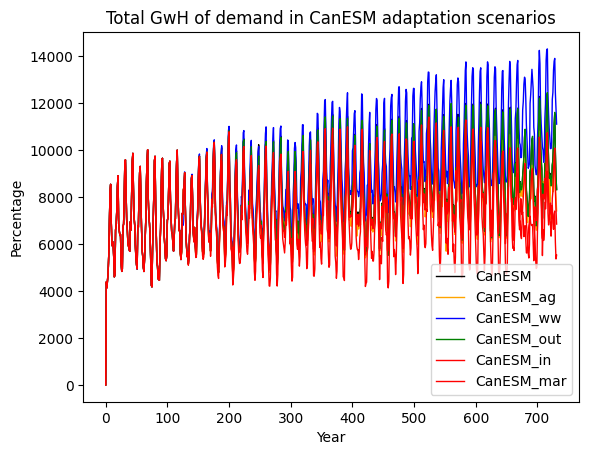

In [38]:
plot_metric_monthly(CanESM_dfs, CanESM_labels, 'Total_GwH', 'Total GwH of demand in CanESM adaptation scenarios')

In [39]:
plot_metric_yearly(CanESM_dfs, CanESM_labels, 'Unmet_Demand_Indoor_Total[AF]', 'Unmet Indoor Demand in CanESM adaptation scenarios')
print('')
plot_metric_yearly(CESM1BGC_dfs, CESM1BGC_labels, 'Unmet_Demand_Indoor_Total[AF]', 'Unmet Indoor Demand in CESM1BGC adaptation scenarios')
print('')
plot_metric_yearly(CMCCCM_dfs, CMCCCM_labels, 'Unmet_Demand_Indoor_Total[AF]', 'Unmet Indoor Demand in CMCCCM adaptation scenarios')

TypeError: category type does not support sum operations

In [ ]:
plot_metric_yearly(CanESM_dfs, CanESM_labels, 'Unmet_Demand_Outdoor_Total[AF]', 'Unmet Outdoor Demand in CanESM adaptation scenarios')
print('')
plot_metric_yearly(CESM1BGC_dfs, CESM1BGC_labels, 'Unmet_Demand_Outdoor_Total[AF]', 'Unmet Outdoor Demand in CESM1BGC adaptation scenarios')
print('')
plot_metric_yearly(CMCCCM_dfs, CMCCCM_labels, 'Unmet_Demand_Outdoor_Total[AF]', 'Unmet Outdoor Demand in CMCCCM adaptation scenarios')

In [ ]:
plot_metric_yearly(CanESM_dfs, CanESM_labels, 'Unmet_Demand_Ag_Total[AF]', 'Unmet Demand in Ag in CanESM adaptation scenarios')
print('')
plot_metric_yearly(CESM1BGC_dfs, CESM1BGC_labels, 'Unmet_Demand_Ag_Total[AF]', 'Unmet Demand in Ag in CESM1BGC adaptation scenarios')
print('')
plot_metric_yearly(CMCCCM_dfs, CMCCCM_labels, 'Unmet_Demand_Ag_Total[AF]', 'Unmet Demand in Ag in CMCCCM adaptation scenarios')

In [ ]:
plot_gw_yearly(CanESM_dfs, CanESM_labels, 'Total_gw_storage', 'Total groundwater storage in CanESM adaptation scenarios')
print('')
plot_gw_yearly(CESM1BGC_dfs, CESM1BGC_labels, 'Total_gw_storage', 'Total groundwater storage in CESM1BGC adaptation scenarios')
print('')
plot_gw_yearly(CMCCCM_dfs, CMCCCM_labels, 'Total_gw_storage', 'Total groundwater storage in CMCCCM adaptation scenarios')

In [ ]:
plot_metric_yearly(CanESM_dfs, CanESM_labels, 'Total_GwH', 'Total GwH of demand in CanESM adaptation scenarios')
print('')
plot_metric_yearly(CESM1BGC_dfs, CESM1BGC_labels, 'Total_GwH', 'Total GwH of demand in CESM1BGC adaptation scenarios')
print('')
plot_metric_yearly(CMCCCM_dfs, CMCCCM_labels, 'Total_GwH', 'Total GwH of demand in CMCCCM adaptation scenarios')

In [ ]:
plot_metric_yearly(CanESM_dfs, CanESM_labels, 'Total_hydro_generation', 'Hydropower generation in CanESM adaptation scenarios')
print('')
plot_metric_yearly(CESM1BGC_dfs, CESM1BGC_labels, 'Total_hydro_generation', 'Hydropower generation in CESM1BGC adaptation scenarios')
print('')
plot_metric_yearly(CMCCCM_dfs, CMCCCM_labels, 'Total_hydro_generation', 'Hydropower generation in CMCCCM adaptation scenarios')

In [ ]:
# #messing around with plotting
# #in general, this plotting worked, but because there are so many points to plot (one per month), 
# #you can't really see what's happening on the graph

# plt.figure(figsize=(25,6))
# plt.plot(dfCanESM['Date'], dfCanESM['Total_GwH'], label='CanESM Total Electricity Use')
# plt.plot(dfCanESM_ag['Date'], dfCanESM_ag['Total_GwH'], label='CanESM Total Electricity Use with Ag Conservation')
# plt.plot(dfCanESM_ww['Date'], dfCanESM_ww['Total_GwH'], label='CanESM Total Electricity Use with WW recycling')
# plt.plot(dfCanESM_in['Date'], dfCanESM_in['Total_GwH'], label='CanESM Total Electricity Use with Indoor conservation')
# plt.plot(dfCanESM_out['Date'], dfCanESM_out['Total_GwH'], label='CanESM Total Electricity Use with Indoor conservation')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Total Electricity use in Gigawatt Hours')
# plt.title('How ag conservation affects total electricity use for water')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


In [ ]:
# CanESM_ag_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Max Ag Conservation')]['Total_GwH'].sum()
# print(CanESM_ag_total_gwh)

# CanESM_ww_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Max Wastewater Recycling')]['Total_GwH'].sum()
# print(CanESM_ww_total_gwh)

# CanESM_in_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Maximum Urban Indoor Conservation')]['Total_GwH'].sum()
# print(CanESM_in_total_gwh)

# CanESM_out_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Maximum Urban Outdoor Conservation')]['Total_GwH'].sum()
# print(CanESM_out_total_gwh)

# CanESM_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM')]['Total_GwH'].sum()
# print(CanESM_total_gwh)

In [ ]:
# CanESM_ag_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Max Ag Conservation')]['Supply_Del_Ag_Total[AF]'].sum()
# print('Ag Conservation, supply delivered to ag ', CanESM_ag_total_gwh)

# CanESM_ww_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Max Wastewater Recycling')]['Supply_Del_Ag_Total[AF]'].sum()
# print('WW Recycling, supply delivered to ag ', CanESM_ww_total_gwh)

# CanESM_in_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Maximum Urban Indoor Conservation')]['Supply_Del_Ag_Total[AF]'].sum()
# print('Indoor Conservation, supply delivered to ag ', CanESM_in_total_gwh)

# CanESM_out_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM - Maximum Urban Outdoor Conservation')]['Supply_Del_Ag_Total[AF]'].sum()
# print('Outdoor Conservation, supply delivered to ag ', CanESM_out_total_gwh)

# CanESM_total_gwh = df[(df['Year'] >=2050) & (df['Scenario'] == 'CanESM')]['Supply_Del_Ag_Total[AF]'].sum()
# print('CanESM only, supply delivered to ag ', CanESM_total_gwh)

In [ ]:
# climate_dfs = [dfCanESM, dfCESM1BGC, dfCMCCCM]
# CanESM_adaptation_dfs = [dfCanESM_ag, dfCanESM_ww, dfCanESM_out, dfCanESM_in, dfCanESM_mar]
# CESM1BGC_adaptation_dfs = [dfCESM1BGC_ag, dfCESM1BGC_ww, dfCESM1BGC_out, dfCESM1BGC_in, dfCESM1BGC_mar]
# CMCCCM_adaptation_dfs = [dfCMCCCM_ag, dfCMCCCM_ww, dfCMCCCM_out, dfCMCCCM_in, dfCMCCCM_mar]

In [ ]:
# df.info()

In [ ]:
# df.sample()

In [ ]:
# df.shape

In [ ]:
# #this needs to be rewritten to handle the situation where there are multiple of the same date
# def add_running_total(df):
#     #sort the dataframe by date
#     df.sort_values(by=['Date'], inplace=True)
    
#     #add a column for running_total to the df
#     df['Running_total']=''
    
#     #create a variable for running total to hold the value that will be placed in the new column
#     running_total=0
    
#     #loop through each row of the dataframe
#     for index, row in df.iterrows():
#         #update the running total variable by adding the value in that row of the dataframe
#         running_total = running_total + row.iloc[2]
#         df.at[index, 'Running_total'] = running_total
        
#     return df
    

In [ ]:
# dfCMCCCM_mar_impacts_groundwater_storage = 
#dfCMCCCM_mar_impacts_groundwater_storage.sort_values(['Location', 'Date'], ascending=[True, True])
    
# #add a new, blank column
# dfCMCCCM_mar_impacts_groundwater_storage['Location_running_total']=''

# #create a variable for running total to hold the value that will be placed in the new column
# running_total=0
# initial_location = dfCMCCCM_mar_impacts_groundwater_storage.at[0, 'Location']

# for index,row in dfCMCCCM_mar_impacts_groundwater_storage.iterrows():
#     #if the new row of data is from the same place
    
#     if initial_location == row.iloc[1]:
#         #add to the running total of unmet demand
#         running_total = running_total + row.iloc[2]
#     else:
#         #else if the new row of data is from a different place
        
#         #then change our variables to start tracking difference in the new location
#         initial_location = row.iloc[1]
#         running_total = row.iloc[2]
#         # print(i[0], initial_location, running_total)
    
#     #add the running total to the appropriate column
#     dfCMCCCM_mar_impacts_groundwater_storage.at[index, 'Location_running_total'] = running_total
    
# dfCMCCCM_mar_impacts_groundwater_storage

In [ ]:
# column_name='Reduction_in_gw_storage'
# dfCMCCCM_mar_impacts_groundwater_storage = determine_differences(dfCMCCCM, dfCMCCCM_mar, groundwater_storage_columns, column_name)

# dfCMCCCM_mar_impacts_groundwater_storage = add_location_running_totals(dfCMCCCM_mar_impacts_groundwater_storage)

In [ ]:
# # def add_running_total(df):
# dfCMCCCM_mar_impacts_groundwater_storage = dfCMCCCM_mar_impacts_groundwater_storage.sort_values(['Location', 'Date'], ascending=[True, True])
    
# #add a new, blank column
# dfCMCCCM_mar_impacts_groundwater_storage['Location_running_total']=''

In [ ]:
# # For each common column, I want to compare values in the equivalent rows of data from two dataframes.
# # this requires a loop within a loop

# #create an empty list in which to add data that is not the same
# all_data_differences=[]

# #for each region's unmet indoor demands
# for i in indoor_unmet_demand_columns:
#     #go through each row of data
#     for counter in range(732):
#         #assign a value for the value in each dataframe in this location
#         value_CanESM = dfCanESM.loc[counter, i]
#         value_CanESM_ag = dfCanESM_ag.loc[counter, i]
#         #check if those values from each data frame are meaningfully different
#         if abs(value_CanESM - value_CanESM_ag)>1:
#             # if the values are meaningfully different, then create a list (row) of the key values which are different
#             data_row = [dfCanESM.Date[counter], i, round(value_CanESM - value_CanESM_ag, 0)]
#             #add the list (row) to the list of data which is not the same
#             all_data_differences.append(data_row)

# #use my function to run the same code
# function_list = determine_differences(dfCanESM, dfCanESM_ag, indoor_unmet_demand_columns)

# #check if the function returns the same value as the code above
# if all_data_differences == function_list:
#     print('the lists are the same')
# else:
#     print('the lists are different')

# #create an empty list of unique locations
# unique_locations = []

# #for every row of data which was different
# for i in all_differences: 
#     #if the location value is not in the list of unique locations, then add it to that list
#     if i[1] not in unique_locations:
#         unique_locations.append(i[1])
        
# ## print the list of unique locations
# # unique_locations

# #make some variables to change we loop through the list of each datapoint that is different
# running_total = 0
# initial_location = unique_locations[0]
# #initial_location

# #for each row of data that is different
# for i in all_differences:
#     #if the new row of data is from the same place, add to the running total of unmet demand
#     if initial_location == i[1]:
#         running_total = running_total + i[2]
#         # print(i[0], initial_location, running_total)
#     else:
#         #else if the new row of data is from a different place
#         #print how much difference there was from this place
#         print('the reduction in indoor unmet demand from', initial_location, 'is', running_total, 'with ag conservation')
        
#         #then change our variables to start tracking difference in the new location
#         initial_location = i[1]
#         running_total = i[2]
#         # print(i[0], initial_location, running_total)

# print('the reduction in indoor unmet demand from', initial_location, 'is', running_total, 'with ag conservation')

# #I want to subtract the values in those rows of data.

# #If the subtracted value is greater than a threshold, I want to save the index number of that row